In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
candy = pd.read_csv(r'D:\REGINA\DA DS\halloween_candy\candy-data.csv')
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


# Data Preprocessing

In [4]:
# to convert sugar percent and price percent into percentages
def change_type(col):
    candy[col] = candy[col].mul(100).round(2)

change_type('sugarpercent')
change_type('pricepercent')

# to round win percentages
candy['winpercent'] = candy['winpercent'].round(2)
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,73.2,86.0,66.97
1,3 Musketeers,1,0,0,0,1,0,0,1,0,60.4,51.1,67.60
2,One dime,0,0,0,0,0,0,0,0,0,1.1,11.6,32.26
3,One quarter,0,0,0,0,0,0,0,0,0,1.1,51.1,46.12
4,Air Heads,0,1,0,0,0,0,0,0,0,90.6,51.1,52.34


In [5]:
# to ensure no negative percentages
candy[['sugarpercent', 'pricepercent', 'winpercent']].abs()

,sugarpercent,pricepercent,winpercent
0,73.2,86.0,66.97
1,60.4,51.1,67.60
2,1.1,11.6,32.26
3,1.1,51.1,46.12
4,90.6,51.1,52.34
...,...,...,...
80,22.0,11.6,45.47
81,9.3,11.6,39.01
82,31.3,31.3,44.38
83,18.6,26.7,41.90


In [6]:
# to ensure no duplicate data
candy.duplicated().sum()

0

In [7]:
# to ensure no null values
candy.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [8]:
# to capitalize the first letter of each word in competitor names
candy['competitorname'] = candy['competitorname'].str.title()

In [9]:
# to ensure the attributes can only be 0 or 1
check_bool = [0, 1]
attributes_col = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
for col in attributes_col:
    if candy[col].isin(check_bool).all():
        print(f"All values in '{col}' are either 0 or 1.")
    else:
        print(f"'{col}' has values other than 0 and 1.'")

All values in 'chocolate' are either 0 or 1.
All values in 'fruity' are either 0 or 1.
All values in 'caramel' are either 0 or 1.
All values in 'peanutyalmondy' are either 0 or 1.
All values in 'nougat' are either 0 or 1.
All values in 'crispedricewafer' are either 0 or 1.
All values in 'hard' are either 0 or 1.
All values in 'bar' are either 0 or 1.
All values in 'pluribus' are either 0 or 1.


In [10]:
# to ensure no percentages exceed 100
percentages_col = ['sugarpercent', 'pricepercent', 'winpercent']
for col in percentages_col:
    if (candy[col] > 100).all():
        print(f"'{col}' contains values over 100.")
    else:
        print(f"All values in '{col}' are less than 100.")

All values in 'sugarpercent' are less than 100.
All values in 'pricepercent' are less than 100.
All values in 'winpercent' are less than 100.


# Exploratory Data Analysis

### Candies to consider buying

In [11]:
most_popular_candy = candy.sort_values('winpercent', ascending=False)
most_popular_candy = most_popular_candy[['competitorname', 'winpercent']].head(3)
most_popular_candy

,competitorname,winpercent
52,Reese'S Peanut Butter Cup,84.18
51,Reese'S Miniatures,81.87
79,Twix,81.64


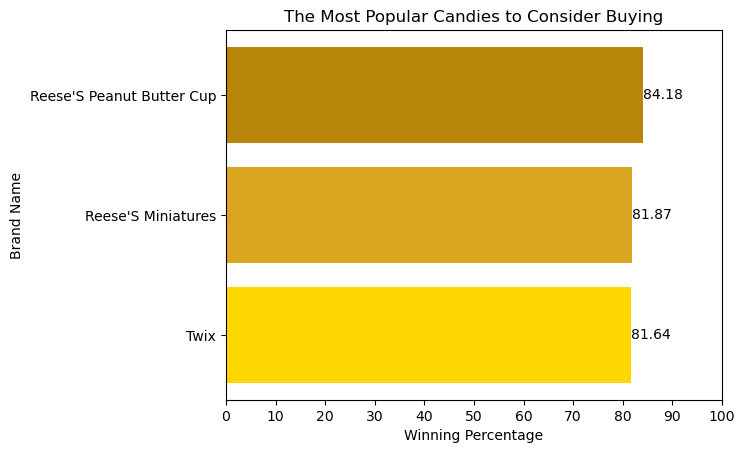

In [12]:
color=['gold', 'goldenrod', 'darkgoldenrod']

index = most_popular_candy['competitorname']
value = most_popular_candy['winpercent']
index = index[::-1]
value = value[::-1]

bar_candy = plt.barh(index, value, color=color)
plt.title('The Most Popular Candies to Consider Buying')
plt.bar_label(bar_candy)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel('Winning Percentage')
plt.ylabel('Brand Name')
plt.show()

### Important candy attributes

In [13]:
df_corr = candy[['chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent']].corr()
df_corr

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,1.000000,-0.741721,0.249875,0.377824,0.254892,0.341210,-0.344177,0.597421,-0.339675,0.104169,0.504675,0.636515
fruity,-0.741721,1.000000,-0.335485,-0.399280,-0.269367,-0.269367,0.390678,-0.515066,0.299725,-0.034393,-0.430969,-0.380934
caramel,0.249875,-0.335485,1.000000,0.059356,0.328493,0.213113,-0.122355,0.333960,-0.269585,0.221933,0.254327,0.213383
peanutyalmondy,0.377824,-0.399280,0.059356,1.000000,0.213113,-0.017646,-0.205557,0.260420,-0.206109,0.087889,0.309153,0.406220
nougat,0.254892,-0.269367,0.328493,0.213113,1.000000,-0.089744,-0.138675,0.522976,-0.310339,0.123081,0.153196,0.199369
crispedricewafer,0.341210,-0.269367,0.213113,-0.017646,-0.089744,1.000000,-0.138675,0.423751,-0.224693,0.069950,0.328265,0.324651
hard,-0.344177,0.390678,-0.122355,-0.205557,-0.138675,-0.138675,1.000000,-0.265165,0.014532,0.091810,-0.244365,-0.310400
bar,0.597421,-0.515066,0.333960,0.260420,0.522976,0.423751,-0.265165,1.000000,-0.593409,0.099985,0.518407,0.429929
pluribus,-0.339675,0.299725,-0.269585,-0.206109,-0.310339,-0.224693,0.014532,-0.593409,1.000000,0.045523,-0.220794,-0.247445
sugarpercent,0.104169,-0.034393,0.221933,0.087889,0.123081,0.069950,0.091810,0.099985,0.045523,1.000000,0.329706,0.229129


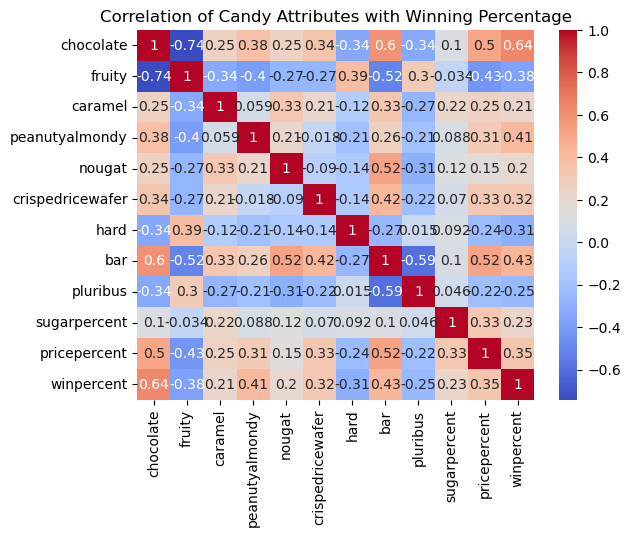

In [14]:
sns.heatmap(df_corr, cmap='coolwarm', annot=True)
plt.title('Correlation of Candy Attributes with Winning Percentage')
plt.show()